# 1. Install Dependencies and Setup

In [124]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu


In [125]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
albumentations               1.3.0
asgiref                      3.6.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
bing-image-downloader        1.1.2
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
distlib                      0.3.6
dj-database-url              1.2.0
Django                       4.1.7
djangorestframework          3.14.0
executing                    1.2.0
filelock                     3.9.0
flatbuffers                  23.3.3
fonttools                    4.39.4
gast                         0.4.0
google-auth                  2.16.2
googl

In [126]:
import tensorflow as tf
import os

In [127]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [128]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [129]:
import cv2
import imghdr

In [134]:
data_dir = 'C:/jerwin/PCMS/classification/static/data/Pupa_defects' 

In [135]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [136]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.1.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.10.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.11.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.12.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.13.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.14.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.15.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.2.jpg
Image not in ext list C:/jerwin/PCMS/classification/static/data/Pupa_defects\Df-Ant bites\ants_bite.3.jpg
Image not in ext list C:/jerwin/PCMS/cla

# 3. Load Data

In [137]:
import numpy as np
from matplotlib import pyplot as plt

In [139]:
data = tf.keras.utils.image_dataset_from_directory('C:/jerwin/PCMS/classification/static/data/Pupa_defects')

Found 75 files belonging to 5 classes.


In [142]:
data_iterator = data.as_numpy_iterator()

In [143]:
batch = data_iterator.next()

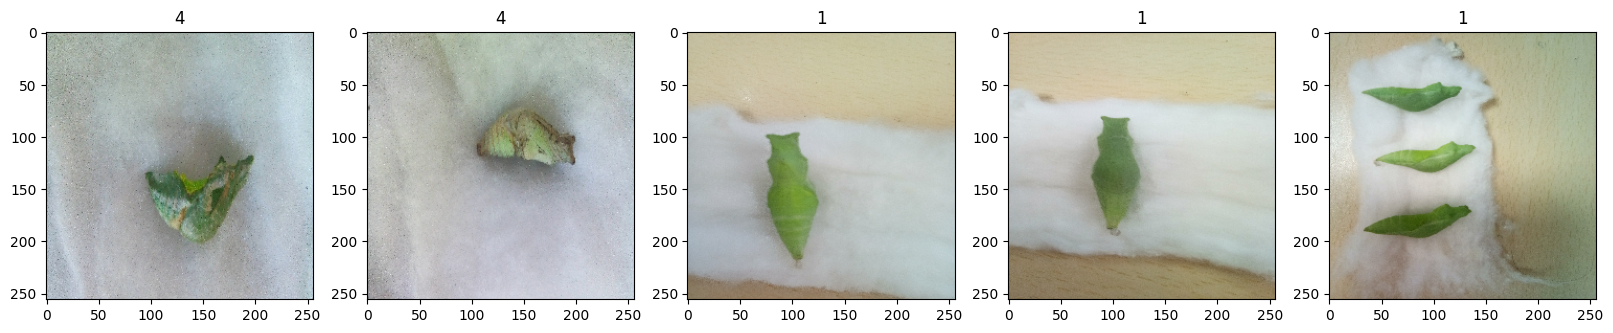

In [145]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [146]:
data = data.map(lambda x,y: (x/255, y))

In [147]:
data.as_numpy_iterator().next()

(array([[[[0.76274896, 0.7823568 , 0.7666705 ],
          [0.7659429 , 0.7855507 , 0.76140857],
          [0.72575444, 0.77281326, 0.7179113 ],
          ...,
          [0.8208908 , 0.81304765, 0.8561849 ],
          [0.77474344, 0.77474344, 0.8139591 ],
          [0.8473039 , 0.8512255 , 0.87083334]],
 
         [[0.7483839 , 0.779879  , 0.7471584 ],
          [0.7189798 , 0.75819546, 0.7150582 ],
          [0.73750764, 0.7767233 , 0.7414292 ],
          ...,
          [0.8299747 , 0.85067785, 0.87420726],
          [0.82423025, 0.85168123, 0.8830538 ],
          [0.8281978 , 0.85564876, 0.8870213 ]],
 
         [[0.74278873, 0.78984755, 0.7349456 ],
          [0.7350567 , 0.78995866, 0.73835784],
          [0.73854935, 0.7941866 , 0.7432062 ],
          ...,
          [0.8222771 , 0.85757124, 0.89286536],
          [0.79136413, 0.82665825, 0.86195236],
          [0.8153378 , 0.858475  , 0.88200444]],
 
         ...,
 
         [[0.77761185, 0.81290597, 0.80114126],
          [0.77456

# 5. Split Data

In [148]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [149]:
train_size

2

In [150]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [151]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [152]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [153]:
model = Sequential()

In [154]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [156]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [157]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14400)            

# 7. Train

In [158]:
logdir='logs'


In [159]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [160]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 8s 2s/step - loss: 0.0000e+00 - accuracy: 0.3750
Epoch 2/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5312
Epoch 3/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5156
Epoch 4/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5156
Epoch 6/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5312
Epoch 7/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5312
Epoch 8/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5156
Epoch 9/20
2/2 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 0.5469
Epoch 10/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5156
Epoch 11/

# 8. Plot Performance

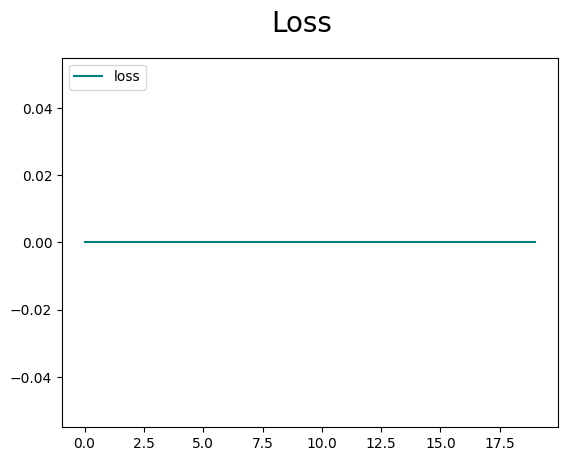

In [161]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
#plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

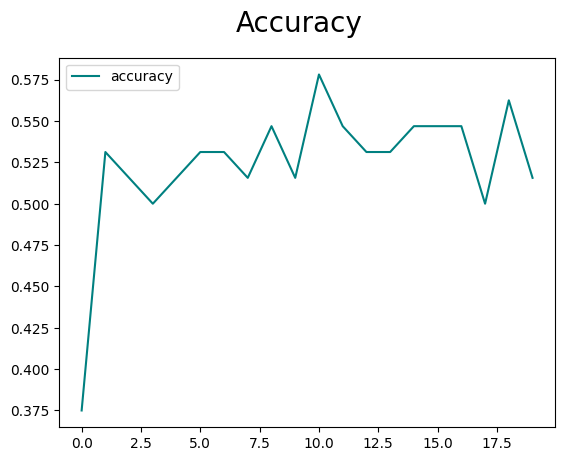

In [162]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
#plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [163]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [164]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [165]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [166]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [167]:
import cv2

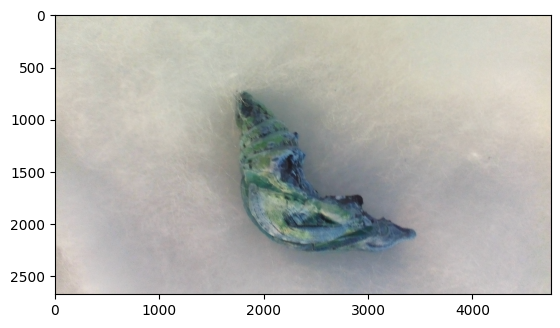

In [169]:
img = cv2.imread('C:/jerwin/PCMS/classification/static/data/Pupa_defects/Df-Overbend/over_bend.2.jpg')
plt.imshow(img)
plt.show()

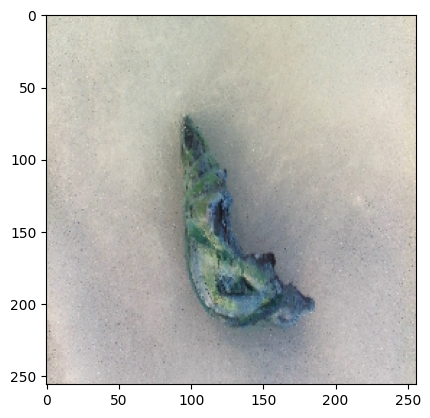

In [170]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [171]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [172]:
yhat

array([[1.]], dtype=float32)

In [176]:
if yhat == 1: 
    print(f'Predicted class is Ants bite')
elif yhat == 4: 
    print(f'Predicted class is Overbend')
elif yhat == 5: 
    print(f'Predicted class is Stretch mark')
elif yhat == 3 : 
    print(f'Predicted class is Old pupa')
elif yhat == 2 :
    print(f'Predicted class is Healthy')
else:
    print("None")

Predicted class is Ants bite


# 11. Save the Model

In [177]:
from tensorflow.python.keras.models import load_model

In [178]:
model.save(os.path.join('models','imageclassifier.h5'))

In [179]:
new_model = load_model('imageclassifier.h5')

OSError: SavedModel file does not exist at: imageclassifier.h5\{saved_model.pbtxt|saved_model.pb}

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)